---

# **Módulo** | Python: Projeto Final
Caderno de **Aula**<br> 
Aluno [Vitor Gabriel](https://www.linkedin.com/in/vitor-gabriel-6690b815b/)

---

# **Tópicos**

<ol type="1">
  <li>Breve descrição do problema;</li>
  <li>Código de importação de bibliotecas;</li>
  <li>Código do download/carregamento/geração de dados;</li>
  <li>Exploração de dados;</li>
  <li>Transformação e limpeza de dados;</li>
  <li>Visualização de dados;</li>
  <li>Storytelling.</li>
</ol>


# 1 - Breve descrição do problema
    
Vou publicar meu notebook de exercícios na plataforma web do Kaggle para que possa compartilhar tudo o que aprendi neste curso e compor o meu portfólio.
    
Os dados de crédito utilizados estão neste neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv). São dados em formato CSV e contém informações sobre clientes de uma instituição financeira fictícia. 

O foco deste trabalho está em identificar se um cliente é adimplente(`default = 0`), ou inadimplente (`default = 1`), ou seja, entender o porque um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira. Desta forma, o interesse em explicar a segunda coluna, chamada de **default**.

> O atributo de interesse (`default`) é conhecido como **variável resposta** ou **variável dependente**, já os demais atributos que buscam explicá-la (`idade`, `salário`, etc.) são conhecidas como **variáveis explicatívas**, **variáveis independentes** ou até **variáveis preditoras**.



| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |



# 2 - Código de importação de bibliotecas

In [90]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import warnings

warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# 3 - Código do download/carregamento/geração de dados

In [91]:
dados = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

# 4 - Etapa de exploração

In [92]:
dados.head(n=10) # Retornar os 10 primeiros valores

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


In [93]:
dados.shape # Retornar uma tupla (qtd linhas, qtd colunas) total

(10127, 16)

In [94]:
dados[dados['default'] == 0].shape # Retornar tupla apenas com default=0

(8500, 16)

In [95]:
dados[dados['default'] == 1].shape # Retornar tupla apenas com default=1

(1627, 16)

In [96]:
# Armazenando os valores para ver a porcentagem total de cada tipo

qtd_total, _ = dados.shape
qtd_adimplentes, _ = dados[dados['default'] == 0].shape
qtd_inadimplentes, _ = dados[dados['default'] == 1].shape

print(f"Clientes adimplentes..: {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"Clientes inadimplentes: {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

Clientes adimplentes..: 83.93%
Clientes inadimplentes: 16.07%


In [97]:
dados.dtypes # Colunas e seus respectivos dados

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [98]:
dados.select_dtypes('object').describe().transpose() # Verificar dados com tipo 'object'

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [99]:
dados.drop('id', axis=1).select_dtypes('number').describe().transpose() # Verificar dados com tipo 'number'

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


In [100]:
# Ao observar os dados identifica-se que existem dados em tipos diferentes e dados faltando (como 'nan', '', 'null' dentre outros)

dados.isna().any()# Verificar quais colunas possuem dados faltantes.

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [101]:
# A função a seguir levanta algumas estatisticas sobre as colunas dos dados faltantes.
def stats_dados_faltantes(dados: pd.DataFrame):

  stats_dados_faltantes = []
  for col in dados.columns:
    if dados[col].isna().any():
      qtd, _ = dados[dados[col].isna()].shape
      total, _ = dados.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [102]:
stats_dados_faltantes(dados=dados) # Dados totais faltantes

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [103]:
stats_dados_faltantes(dados=dados[dados['default'] == 0]) # Dados faltantes apenas em default=0

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [104]:
stats_dados_faltantes(dados=dados[dados['default'] == 1]) # Dados faltantes apenas em default=1

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


> Assim foram observados dois problemas nesses dados: 

>1 - O tipo errado de 2 colunas (limite_credito e valor_transacoes_12m). Onde os tipos foram salvos como 'object' no lugar de 'number', sendo necessária a alteração; 

>2 - Falta de dados em 3 colunas(escolaridade, estado_civil e salario_anual). De forma que os dados estão faltando em mesma porcentagem e não prejudicam a informação da coleta, podendo assim filtrar os dados totais.

# 5 - Etapa de limpeza e transformação

In [105]:
# Criada uma função `lambda` para limpar os dados. Mas antes, é necessário testar sua aplicação através do método funcional `map`:

fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

valores_teste = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_teste))

print(valores_teste)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


In [106]:
# Com a função `lambda` de limpeza pronta, basta aplica-la nas colunas:

dados['valor_transacoes_12m'] = dados['valor_transacoes_12m'].apply(fn)
dados['limite_credito'] = dados['limite_credito'].apply(fn)

In [107]:
# Descrever novamente o schema

dados.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [108]:
# Verificando se ouve a troca de tipos nos Atributos categóricos.

dados.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [109]:
# Verificando se ouve a troca de tipos nos Atributos numéricos.

dados.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


In [110]:
# Com o primeiro problema resolvido, seguimos para a Remoção de dados faltantes:
# Como o pandas está ciente do que é um dados faltante, usamos do mesmo para a remoção das linhas problemáticas.

dados.dropna(inplace=True)

In [111]:
# Analizando a estrutura dos dados novamente:

dados.shape

(7081, 16)

In [112]:
dados[dados['default'] == 0].shape

(5968, 16)

In [113]:
dados[dados['default'] == 1].shape

(1113, 16)

In [114]:
# Ao verificar que houve o 'drop', será feita a comparação com os dados antigos e mostrar a nova porcentagem de dados.

qtd_total_novo, _ = dados.shape
qtd_adimplentes_novo, _ = dados[dados['default'] == 0].shape
qtd_inadimplentes_novo, _ = dados[dados['default'] == 1].shape

print(f"Proporcão antiga de adimplentes..: {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"Proporcão antiga de inadimplentes: {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print("")
print(f"Proporcão nova de adimplentes....: {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print(f"Proporcão nova de inadimplentes..: {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

Proporcão antiga de adimplentes..: 83.93%
Proporcão antiga de inadimplentes: 16.07%

Proporcão nova de adimplentes....: 84.28%
Proporcão nova de inadimplentes..: 15.72%


# 6 - Etapa de análise (com visualizações)

> Com os dados prontos, inicia-se as visualizações para correlacionar variáveis explicativas com a variável resposta para 
 buscar entender qual fator leva um cliente a inadimplencia. E para isso, sempre comparar a base com todos os clientes 
 com a base de adimplentes e inadimplentes.

In [115]:
# Separação dos clientes adimplentes e inadimplentes

dados_adimplente = dados[dados['default'] == 0]
dados_inadimplente = dados[dados['default'] == 1]

In [116]:
#Visualização da relação entre a variável resposta default com os atributos categóricos.

dados.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


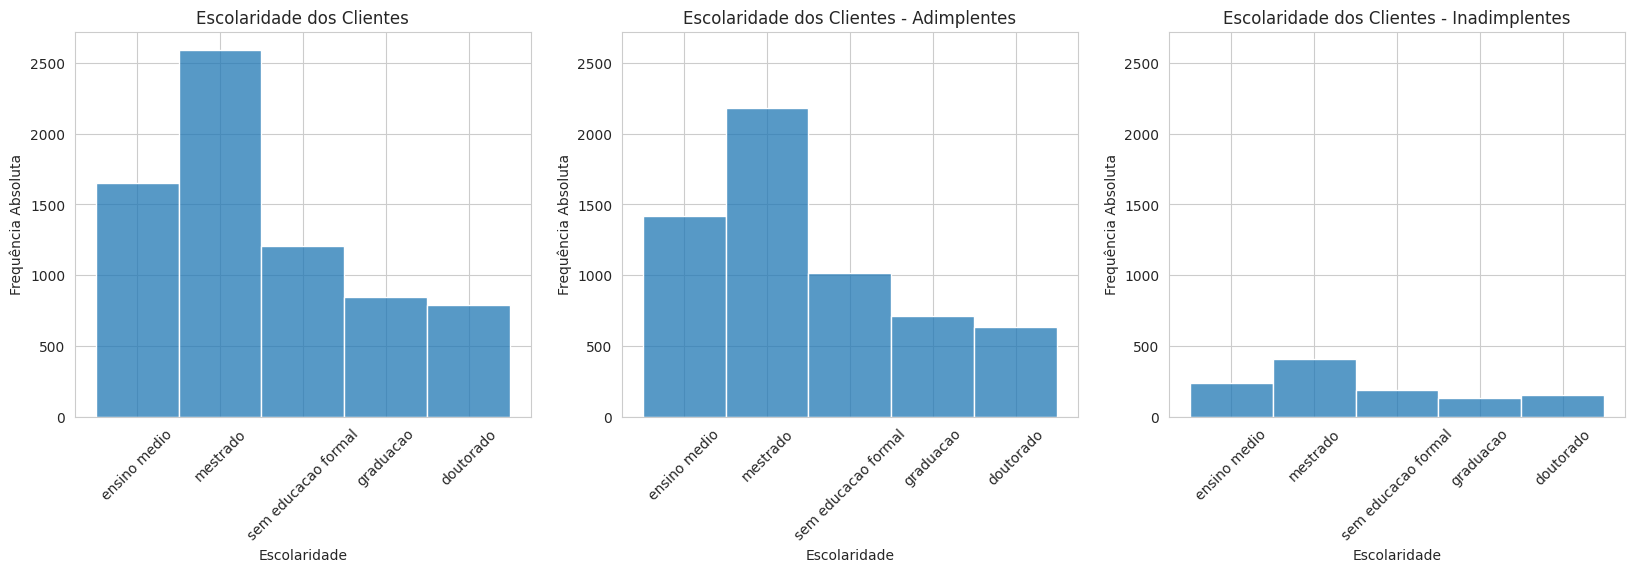

In [117]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes - Adimplentes', 'Escolaridade dos Clientes - Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True) #Divisão em 3 subplots, sendo a quantidade deles nos dados totais, os adimplentes e os inadimplentes

for dataframe in [dados, dados_adimplente, dados_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo]) # 'count' = Contar o total
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta') # Títulos dos gráficos e dos eixos
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=45) # Rotacionar os labels do eixo X

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

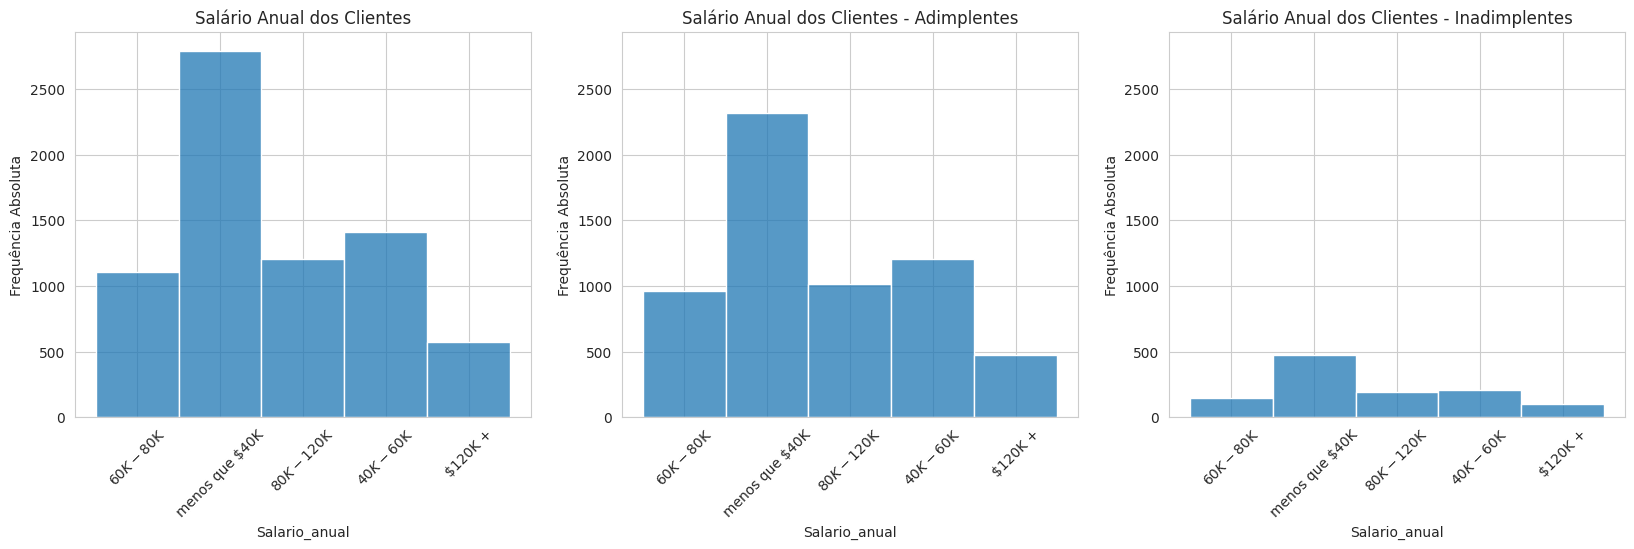

In [118]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes - Adimplentes', 'Salário Anual dos Clientes - Inadimplentes']
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [dados, dados_adimplente, dados_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=45)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

In [119]:
#Visualização da relação entre a variável resposta default com os atributos numéricos.

dados.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


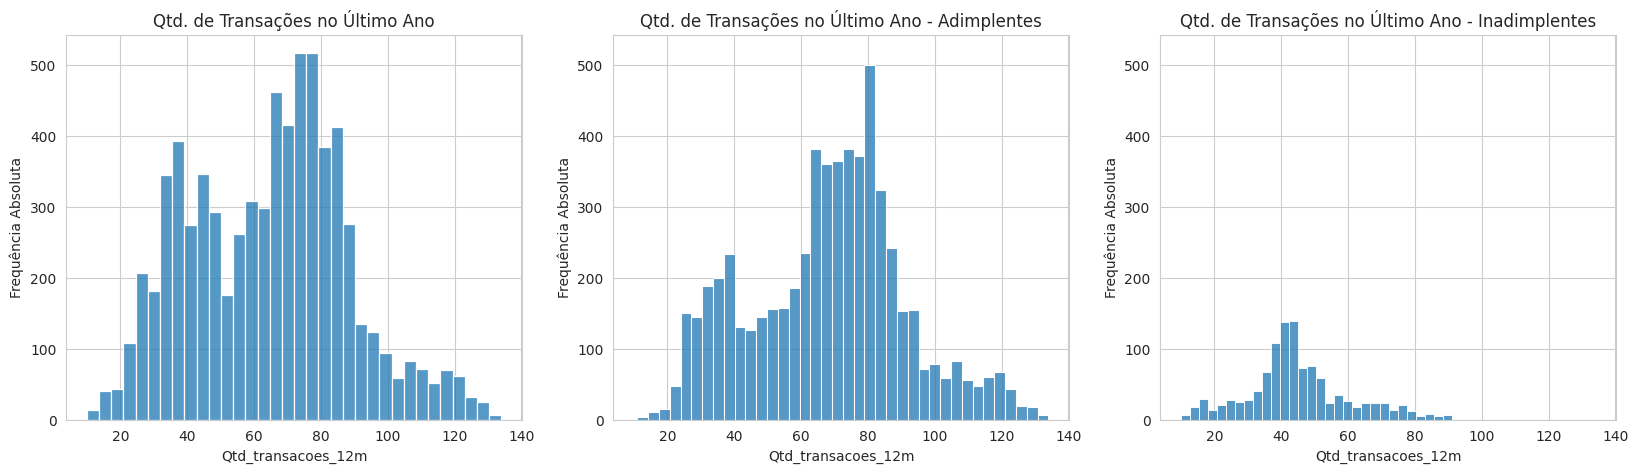

In [120]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano - Adimplentes', 'Qtd. de Transações no Último Ano - Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [dados, dados_adimplente, dados_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

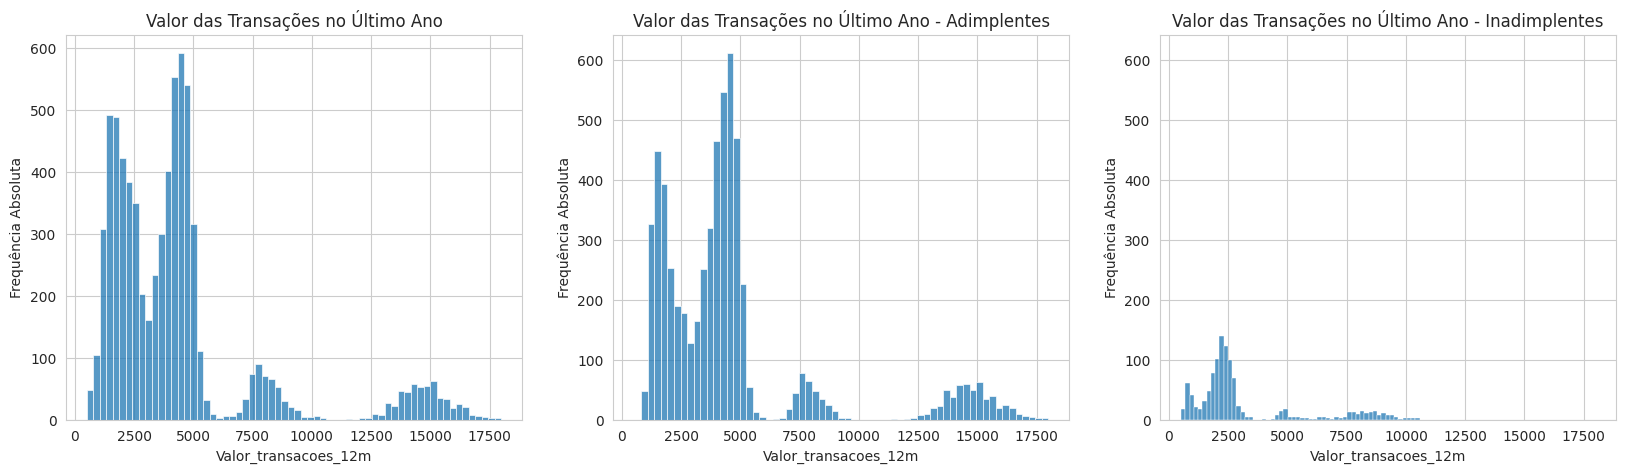

In [121]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano - Adimplentes', 'Valor das Transações no Último Ano - Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [dados, dados_adimplente, dados_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

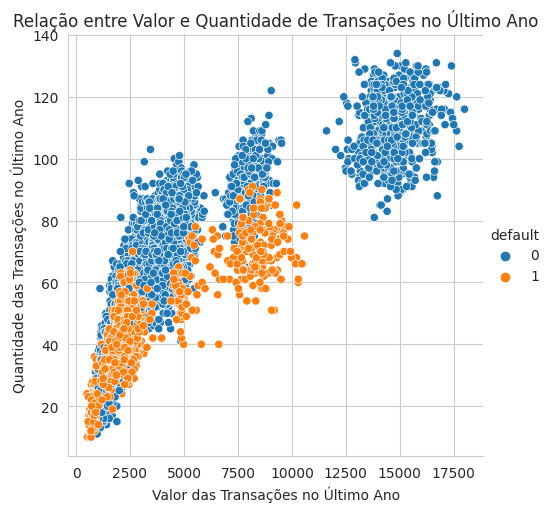

In [122]:
# Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses

f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=dados, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
  )

# 7 - Resumo dos *insights* gerados

Na etápa de exploração dos dados, ao observar os dados, foram observados dois problemas: 
 - O tipo errado de 2 colunas (limite_credito e valor_transacoes_12m). Onde os tipos foram salvos como 'object' no lugar de 'number', sendo necessária a alteração;
 - Falta de dados em 3 colunas (escolaridade, estado_civil e salario_anual). De forma que os dados estão faltando em mesma porcentagem e não prejudicam a informação da coleta, podendo assim filtrar os dados totais.

Com os dados filtrados, inicia-se as visualizações para correlacionar variáveis explicativas com a variável resposta para buscar entender qual fator leva um cliente a inadimplencia. Para isso, sempre comparar a base com todos os clientes com a base de adimplentes e inadimplentes.

Na relação entre a variável resposta 'default' com os atributos categóricos não foi identificado efeito significativo na pesquisa, não sendo utilizados para resposta do problema.

Na relação entre a variável resposta 'default' com os atributos numéricos já se identifica um fator de inadimplencia, a relação entre valor e quantidade de transações no último ano. De forma que ao possuir quantidades menores de valor e quantidade de transações o cliente tende a ser inadimplente, o que se diz do contrário também, ao possuir quantidade maiores de valor e quantidade de transações o cliente possui mais chance de ser adimplente.